In [130]:
import os, shutil
# Download path
original_dataset_dir = 'D:/Project/CNN/train' 
# split smaller ones in another path
base_dir = 'cats_and_dogs' 
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(5000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(5000, 7500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(7500, 9000)]
for fname in fnames:
     src = os.path.join(original_dataset_dir, fname)
     dst = os.path.join(test_cats_dir, fname)
     shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(5000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(5000, 7500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(7500, 9000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 5000
total training dog images: 5000
total validation cat images: 2500
total validation dog images: 2500
total test cat images: 1500
total test dog images: 1500


In [131]:
from keras import layers
from keras import models

Add CNN Layers:

conv2D layers: extract complex features from the input images

MaxingPooling2d layers:reduce the spatial dimensions of the output feature maps

Danse which after Flatten: help model learn more complex non-linear mappings

In [132]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 128)     

In [135]:
# preprocess
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_dir='D:/Project/CNN/cats_and_dogs/train'
validation_dir='D:/Project/CNN/cats_and_dogs/validation'

#generate batch 
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')



Found 10000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


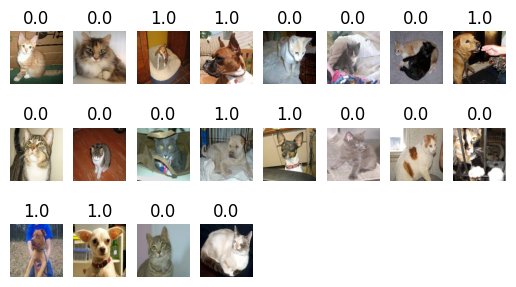

In [152]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
images, labels = train_generator.next()

# plot the first batch of images
for i in range(len(images)):
    plt.subplot(4, 8, i+1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')
plt.show()

Train the model

In [137]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [138]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=200)

C:\Users\10214\AppData\Local\Temp\ipykernel_8\3461878275.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/20
500/500 [==============================] - 280s 558ms/step - loss: 0.6699 - acc: 0.5784 - val_loss: 0.5840 - val_acc: 0.7017
Epoch 2/20
500/500 [==============================] - 249s 498ms/step - loss: 0.5881 - acc: 0.6933 - val_loss: 0.5265 - val_acc: 0.7492
Epoch 3/20
500/500 [==============================] - 254s 507ms/step - loss: 0.5048 - acc: 0.7544 - val_loss: 0.4433 - val_acc: 0.7918
Epoch 4/20
500/500 [==============================] - 251s 502ms/step - loss: 0.4263 - acc: 0.8074 - val_loss: 0.4262 - val_acc: 0.8008
Epoch 5/20
500/500 [==============================] - 252s 504ms/step - loss: 0.3567 - acc: 0.8377 - val_loss: 0.4468 - val_acc: 0.8130
Epoch 6/20
500/500 [==============================] - 250s 500ms/step - loss: 0.3027 - acc: 0.8656 - val_loss: 0.3579 - val_acc: 0.8410
Epoch 7/20
500/500 [==============================] - 249s 499ms/step - loss: 0.2374 - acc: 0.9024 - val_loss: 0.3967 - val_acc: 0.8443
Epoch 8/20
500/500 [============================

In [142]:
model.save('cats_and_dogs_small_2.h5')


Result

In [21]:
import matplotlib.pyplot as plt

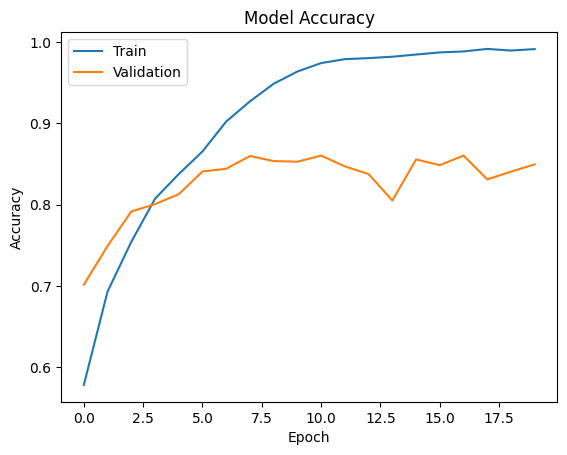

In [141]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Write a function to predict specific img

In [139]:
from keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

from tensorflow.keras.preprocessing.image import load_img,img_to_array
def prediction(img_path):
    model = load_model('cats_and_dogs_small_2.h5')
    img = load_img(img_path, target_size=(150, 150))
    img_tensor = img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor/= 255.
    prediction = model.predict(img_tensor, steps=1)
    result=np.round(prediction)[0][0]
    print(prediction[0][0],result)
    plt.imshow(img)
    plt.show()
    if(result==1):
        return "It is dog!"
    else:
        return "It is cat!"

    
        

1/1 [==============================] - 0s 95ms/step
0.99997365 1.0


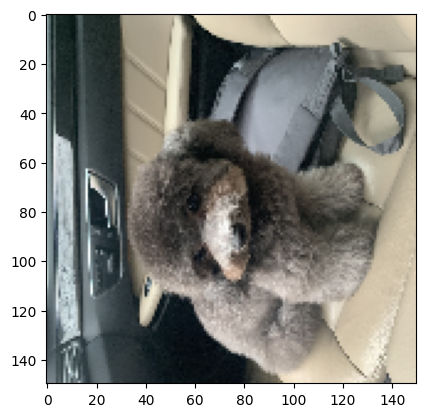

1/1 [==============================] - 0s 81ms/step
0.9999958 1.0


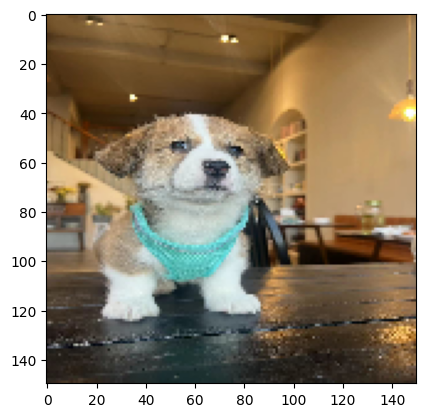

'It is dog!'

In [164]:
prediction( '00.jpg')
prediction('0.jpg')
